In [1]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib notebook

In [2]:
cd ../

D:\Work-Projects\MyProgs\PyWorkScripts\PyDiagORB5


In [3]:
run start_template.py

<IPython.core.display.Javascript object>


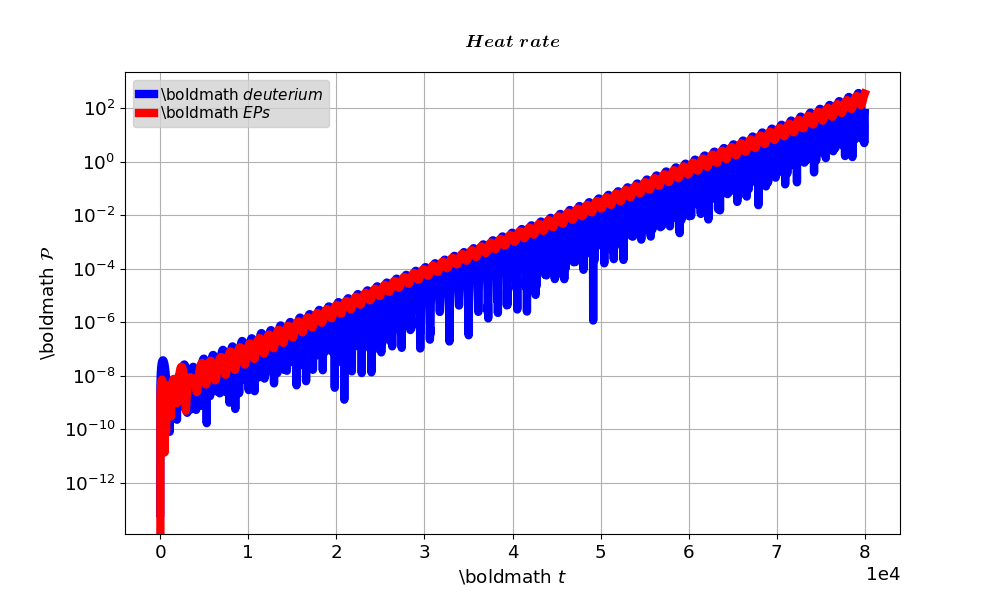

In [17]:
# ****************************************************
# *** TIME EVOLUTION OF FIELD ENERGY AND HEAR RATE ***
# ****************************************************
reload()

# --- Field energy ---
ff = dict(GLO.DEF_PLOT_FORMAT)
ff['xlabel'] = 't'
ff['ylabel'] = '\mathcal{E}'
ff['title'] = 'Field\ energy'
ff['legends'] = ['ES', 'EM']
ff['flag_semilogy'] = True

ch_signals = GLO.create_signals_dds(GLO.def_efield, [b025_f001, b025k_f001])
oo = {
    'signals': ch_signals,
    'ff': ff,
}
common.plot_vars_1d(oo)

# --- Heat rate ---
ff.update({
    'ylabel': '\mathcal{P}',
    'title': 'Heat\ rate',
    'legends': ['deuterium', 'EP']
})

ch_signals = GLO.create_signals_dds(
    GLO.def_je, 
    [b025_f001, b025_f001], 
    species=['deuterium', 'fast'],
    planes=['tnone'] * 2,
    operations = ['none-'] * 2,
)
oo = {
    'signals': ch_signals,
    'ff': ff,
}
common.plot_vars_1d(oo)

<IPython.core.display.Javascript object>


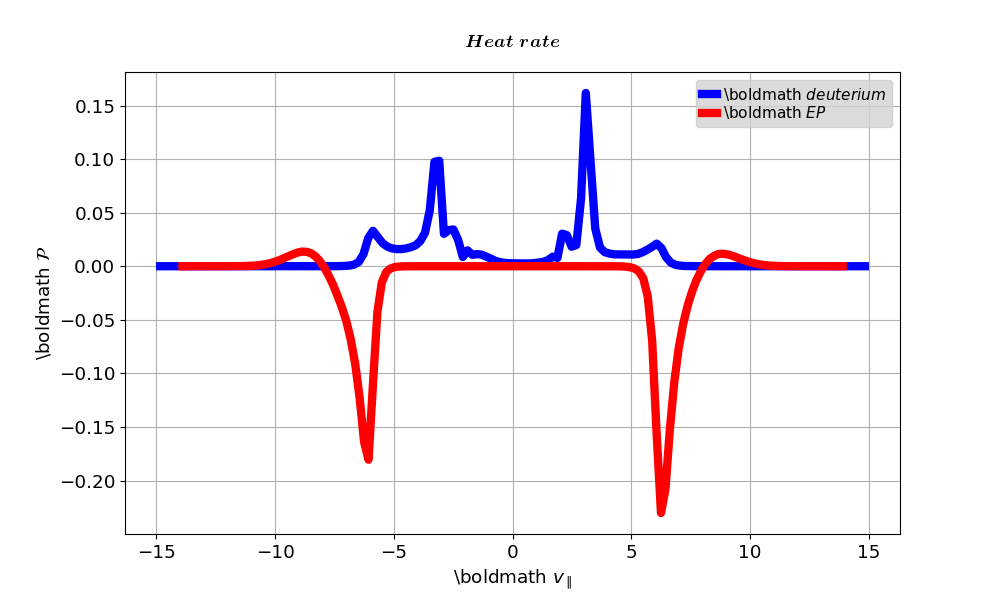

In [18]:
# ****************************************************
# *** HEAR RATE ALONG VPAR ***
# ****************************************************
reload()

ff = dict(GLO.DEF_PLOT_FORMAT)
ff['xlabel'] = 'v_{\parallel}'
ff['ylabel'] = '\mathcal{P}'
ff['title'] = 'Heat\ rate'
ff['legends'] = ['deuterium', 'EP']

ch_signals = GLO.create_signals_dds(
    GLO.def_je, 
    [b025_f001, b025_f001], 
    species=['deuterium', 'fast'],
    planes=['tvpar'] * 2,
    operations = ['mean-t'] * 2,
    domains = [[5e4, 7e4]] * 2
)
oo = {
    'signals': ch_signals,
    'ff': ff,
}
common.plot_vars_1d(oo)

<IPython.core.display.Javascript object>


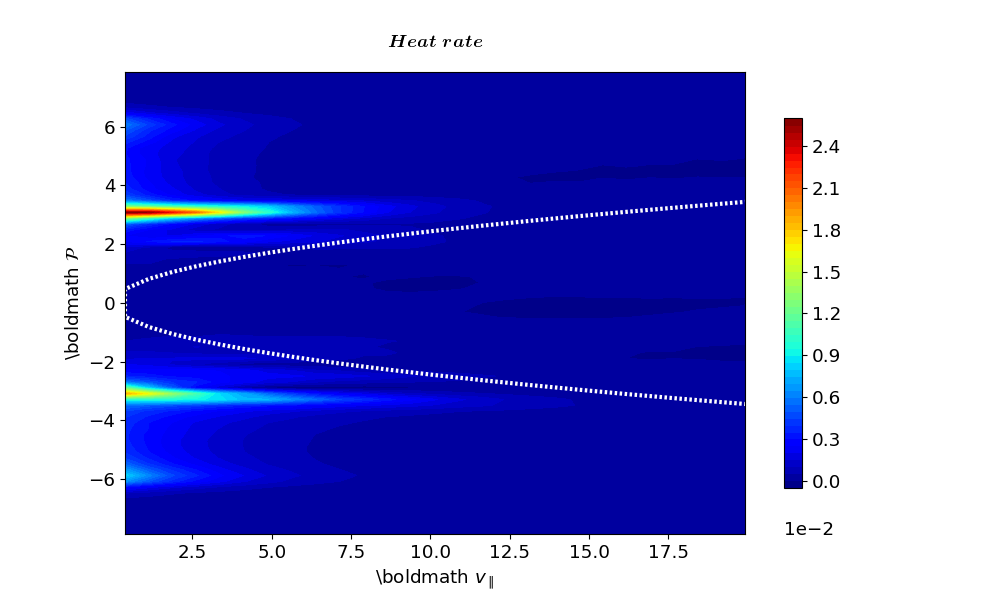

In [36]:
# ****************************************************
# *** HEAR RATE IN VELOCITY SPACE ***
# ****************************************************
reload()

dd = b025_f001
species_chosen = 'deuterium'

# signal
ch_signal = GLO.create_signals_dds(
    GLO.def_je, 
    [dd], 
    variables=['jdote_es-mean-t'],
    species=[species_chosen],
    planes=['vparmu'],
    operations = ['none-'],
)[0]
ch_signal['t-domain'] = [5e4, 7e4]

# styling
ff = dict(GLO.DEF_PLOT_FORMAT)
ff['xlabel'] = 'v_{\parallel}'
ff['ylabel'] = '\mathcal{P}'
ff['title'] = 'Heat\ rate'

# geometrical figures:
import MPR as mpr
pt_boundary = GEO.pass_trap_boundary(
    dd, 
    mpr.get_vel_grid(dd, species_chosen)['mu']
)['geom']

geoms = [pt_boundary]

# plotting
oo = {
    'signal': ch_signal,
    'ff': ff,
    'geoms': geoms,
    'mu_end': 20,
    'vpar_start': -8, 'vpar_end': 8
}
common.plot_vars_2d(oo)